In [81]:
import pandas as pd
import keras

from tensorflow.keras.preprocessing.text import Tokenizer

from keras.utils import pad_sequences

from keras.models import Sequential,Model
from keras.layers import Dense,SimpleRNN,Embedding,LSTM,GRU,Bidirectional

import emoji
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
fake=pd.read_csv(r"/kaggle/input/fake-and-real-news-dataset/Fake.csv")
true=pd.read_csv(r"/kaggle/input/fake-and-real-news-dataset/True.csv")

In [41]:
fake["News_Type"]=0
true["News_Type"]=1

In [42]:
true.drop(columns=["title","subject","date"],inplace=True)
fake.drop(columns=["title","subject","date"],inplace=True)

In [43]:
news=pd.concat([fake,true])

In [44]:
news.head()

,text,News_Type
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [45]:
news.duplicated().sum()

6251

In [46]:
news=news.drop_duplicates(keep="first")

In [47]:

def textpp(x):
    
    
    x=x.lower()
    x=re.sub("<.+?"," ",x)
    x=re.sub("http[s]?:'//.+? +"," ",x)
    x= re.sub("[]()/{}*\-.,@#$%^&0-9[!_]"," ",x)
    x = re.sub(r'\b\w{1}\b', '', x)
    
    
    return x
    

In [48]:
news["text"] = news["text"].apply(textpp)

In [49]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
nltk.download("stopwords")
stp=stopwords.words("english")
stp.remove("not")


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
def stp1(x):
   l=[]
   for word in word_tokenize(x):

          if word in stp:
             pass
          elif len(word)<=2:
             pass
          else:
            l.append(word)
   return " ".join(l)

In [51]:
news["text"]

0        donald trump just couldn  wish all americans  ...
1        house intelligence committee chairman devin nu...
2        on friday  it was revealed that former milwauk...
3        on christmas day  donald trump announced that ...
4        pope francis used his annual christmas day mes...
                               ...                        
21412    brussels  reuters    nato allies on tuesday we...
21413    london  reuters    lexisnexis   provider of le...
21414    minsk  reuters    in the shadow of disused sov...
21415    moscow  reuters    vatican secretary of state ...
21416    jakarta  reuters    indonesia will buy    sukh...
Name: text, Length: 38647, dtype: object

In [52]:
news["text"] = news["text"].apply(lambda x : stp1(x))

In [53]:
news.head()

,text,News_Type
0,donald trump wish americans happy new year lea...,0
1,house intelligence committee chairman devin nu...,0
2,friday revealed former milwaukee sheriff david...,0
3,christmas day donald trump announced would bac...,0
4,pope francis used annual christmas day message...,0


In [54]:
fv=news.iloc[:,0:1]
cv=news.iloc[:,-1]

In [55]:
fv

,text
0,donald trump wish americans happy new year lea...
1,house intelligence committee chairman devin nu...
2,friday revealed former milwaukee sheriff david...
3,christmas day donald trump announced would bac...
4,pope francis used annual christmas day message...
...,...
21412,brussels reuters nato allies tuesday welcomed ...
21413,london reuters lexisnexis provider legal regul...
21414,minsk reuters shadow disused soviet era factor...
21415,moscow reuters vatican secretary state cardina...


In [56]:
le=LabelEncoder()

fcv=le.fit_transform(cv)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(fv,fcv,test_size=0.2)

In [58]:
tk=Tokenizer(oov_token="nm")

tk.fit_on_texts(x_train["text"])

In [59]:
tk.index_word

{1: 'nm',
 2: 'said',
 3: 'trump',
 4: 'not',
 5: 'would',
 6: 'president',
 7: 'people',
 8: 'one',
 9: 'state',
 10: 'reuters',
 11: 'new',
 12: 'also',
 13: 'donald',
 14: 'house',
 15: 'government',
 16: 'republican',
 17: 'states',
 18: 'clinton',
 19: 'obama',
 20: 'year',
 21: 'could',
 22: 'united',
 23: 'told',
 24: 'white',
 25: 'campaign',
 26: 'two',
 27: 'like',
 28: 'election',
 29: 'last',
 30: 'party',
 31: 'time',
 32: 'washington',
 33: 'first',
 34: 'news',
 35: 'country',
 36: 'former',
 37: 'even',
 38: 'years',
 39: 'many',
 40: 'security',
 41: 'say',
 42: 'percent',
 43: 'law',
 44: 'republicans',
 45: 'may',
 46: 'court',
 47: 'made',
 48: 'national',
 49: 'since',
 50: 'american',
 51: 'right',
 52: 'make',
 53: 'hillary',
 54: 'political',
 55: 'get',
 56: 'administration',
 57: 'presidential',
 58: 'russia',
 59: 'going',
 60: 'senate',
 61: 'media',
 62: 'police',
 63: 'twitter',
 64: 'according',
 65: 'democratic',
 66: 'bill',
 67: 'week',
 68: 'back',
 6

In [60]:
len(tk.index_word)

103049

In [61]:
tokenized_data=tk.texts_to_sequences(x_train["text"])
final_data=pad_sequences(tokenized_data,padding="post",maxlen=150)


In [62]:
final_data.shape

(30917, 150)

In [63]:
test_data=tk.texts_to_sequences(x_test["text"])

final_tdata=pad_sequences(test_data,padding="post",maxlen=150)

final_tdata.shape

(7730, 150)

In [77]:
model = Sequential()
model.add(Embedding(103049,10,input_length=(150,)))
model.add(SimpleRNN(120, activation="relu",return_sequences=False))
model.add(Dense(1, activation="sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [78]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [79]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.00001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

In [80]:
history=model.fit(final_data,y_train,epochs=10,batch_size=20,validation_split=0.2)

Epoch 1/10
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.6086 - loss: 0.6895 - val_accuracy: 0.5556 - val_loss: 0.6635
Epoch 2/10
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.6253 - loss: 0.6263 - val_accuracy: 0.7791 - val_loss: 0.4553
Epoch 3/10
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8256 - loss: 0.4474 - val_accuracy: 0.9146 - val_loss: 0.4296
Epoch 4/10
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.9090 - loss: 0.4003 - val_accuracy: 0.9122 - val_loss: 0.3908
Epoch 5/10
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.9285 - loss: 0.3676 - val_accuracy: 0.9337 - val_loss: 0.3588
Epoch 6/10
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.9380 - loss: 0.3257 - val_accuracy: 0.9031 - val_loss: 0.2341
Epoch 7/10
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.9353 - loss: 0.1731 - val_accuracy: 0.9322 - val_loss: 0.1740
Epoch 8/10
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.9485 -

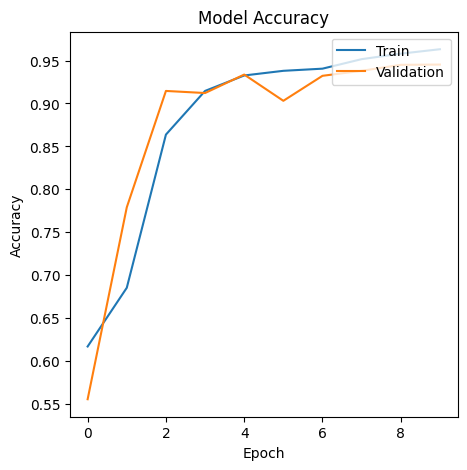

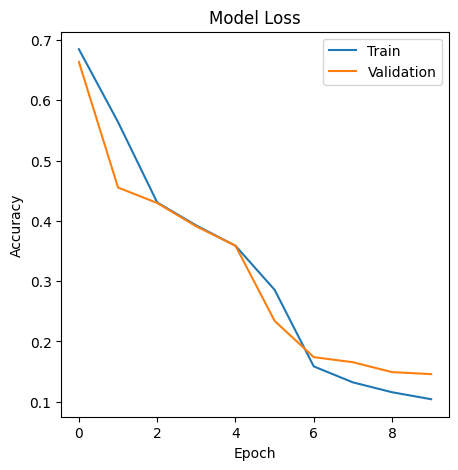

In [83]:
import matplotlib.pyplot as plt
# Plot training accuracy
plt.figure(figsize=(5,5))

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training accuracy
plt.figure(figsize=(5,5))

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [84]:
y_pred=model.predict(final_tdata)

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [85]:
import numpy as np
pfinal=np.where(model.predict(final_tdata)>=0.5,1,0).ravel()

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pfinal)

0.9456662354463131

In [88]:
# Convert the predicted probabilities to binary labels
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# Classification report
print(classification_report(y_test, y_pred_binary, target_names=["Fake", "True"]))

              precision    recall  f1-score   support

        Fake       0.94      0.94      0.94      3492
        True       0.95      0.95      0.95      4238

    accuracy                           0.95      7730
   macro avg       0.95      0.94      0.95      7730
weighted avg       0.95      0.95      0.95      7730



In [94]:
cm=confusion_matrix(y_test, y_pred_binary)

In [95]:
print(cm)

[[3272  220]
 [ 200 4038]]


In [32]:
news["text"][21417]

'thought muslims cornered market abusing gays since see story mainstream media please feel free share baltimore city police arrested aide rep sander levin mich around oct criminal domestic violence charges tim foster native henderson brutally beat male lover small black red shovel according police report obtained roll call leaving victim hospitalized abrasions bruises upper back neck torso dispute started around inside northwest baltimore home foster got verbal argument year old black male identified boyfriend foster put boyfriend choke hold stated want kill die dirty faggy man later told police foster released allegedly grabbed stainless kitchen knife boyfriend fled toward stairs foster chased warned reach fifth step going stab foster lunged boyfriend knife foster wife got way knife fell floor report states boyfriend told police attempted escape property assaulted foster time foster struck upper back small black red shovel foster continued assault man got vehicle report states police 

In [75]:
# Prediction with RNN Model
query = ["thought muslims cornered market abusing gays since see story mainstream media please feel free share baltimore city police arrested aide rep sander levin mich around oct criminal domestic violence charges tim foster native henderson brutally beat male lover small black red shovel according police report obtained roll call leaving victim hospitalized abrasions bruises upper back neck torso dispute started around inside northwest baltimore home foster got verbal argument year old black male identified boyfriend foster put boyfriend choke hold stated want kill die dirty faggy man later told police foster released allegedly grabbed stainless kitchen knife boyfriend fled toward stairs foster chased warned reach fifth step going stab foster lunged boyfriend knife foster wife got way knife fell floor report states boyfriend told police attempted escape property assaulted foster time foster struck upper back sm"]

# Tokenize and pad the query
tokenized_query = tk.texts_to_sequences(query)
padded_query = pad_sequences(tokenized_query, padding="post", maxlen=150)

# Predict
rnn_prediction = model.predict(padded_query)

# Convert prediction to class label
rnn_label = np.where(rnn_prediction >= 0.5, 1, 0).ravel()

# Output the predicted label
predicted=le.inverse_transform(rnn_label)
if predicted==1:
    print("Given news is True")
else:
    print("Given news is Fake")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Given news is Fake


In [36]:
#LSTM

In [99]:
from tensorflow.keras.layers import LSTM, Dense,Input,GlobalMaxPooling1D,Dropout
from tensorflow.keras.optimizers import Adam
inputt = Input(shape=(150,))
x = Embedding(105621, 10)(inputt)
x = Dropout(0.5)(x)
x = LSTM(150, return_sequences=True, recurrent_dropout=0.2)(x)
x = Dropout(0.5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

lstmmodel = Model(inputt, x)

# Compile model
lstmmodel.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [100]:
history = lstmmodel.fit(final_data, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
773/773 ━━━━━━━━━━━━━━━━━━━━ 153s 191ms/step - accuracy: 0.6300 - loss: 0.6293 - val_accuracy: 0.9090 - val_loss: 0.3395
Epoch 2/10
773/773 ━━━━━━━━━━━━━━━━━━━━ 149s 192ms/step - accuracy: 0.9025 - loss: 0.3145 - val_accuracy: 0.9282 - val_loss: 0.2755
Epoch 3/10
773/773 ━━━━━━━━━━━━━━━━━━━━ 149s 193ms/step - accuracy: 0.9320 - loss: 0.2322 - val_accuracy: 0.9465 - val_loss: 0.2370
Epoch 4/10
773/773 ━━━━━━━━━━━━━━━━━━━━ 149s 193ms/step - accuracy: 0.9520 - loss: 0.1715 - val_accuracy: 0.9521 - val_loss: 0.2043
Epoch 5/10
773/773 ━━━━━━━━━━━━━━━━━━━━ 150s 194ms/step - accuracy: 0.9609 - loss: 0.1417 - val_accuracy: 0.9630 - val_loss: 0.1981
Epoch 6/10
773/773 ━━━━━━━━━━━━━━━━━━━━ 148s 191ms/step - accuracy: 0.9683 - loss: 0.1207 - val_accuracy: 0.9654 - val_loss: 0.2005
Epoch 7/10
773/773 ━━━━━━━━━━━━━━━━━━━━ 149s 193ms/step - accuracy: 0.9742 - loss: 0.1037 - val_accuracy: 0.9605 - val_loss: 0.1370
Epoch 8/10
773/773 ━━━━━━━━━━━━━━━━━━━━ 149s 192ms/step - accuracy: 0.9787 -

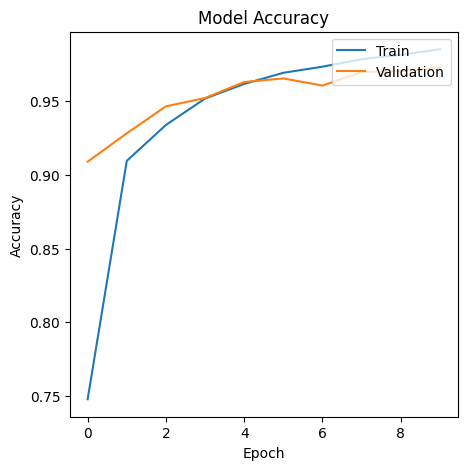

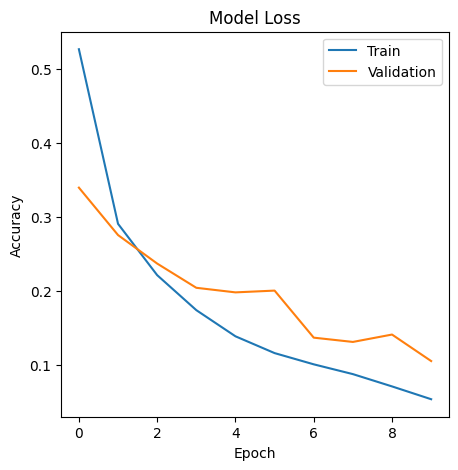

In [102]:
plt.figure(figsize=(5,5))

plt.plot(lstmmodel.history.history['accuracy'])
plt.plot(lstmmodel.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training accuracy
plt.figure(figsize=(5,5))

plt.plot(lstmmodel.history.history['loss'])
plt.plot(lstmmodel.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [103]:
y_pred_lstm=lstmmodel.predict(final_tdata)
pfinal_lstm=np.where(lstmmodel.predict(final_tdata)>=0.5,1,0).ravel()

242/242 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step
242/242 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step


In [104]:
# Convert the predicted probabilities to binary labels
y_pred_binary_lstm = np.where(y_pred >= 0.5, 1, 0)

# Classification report
print(classification_report(y_test, y_pred_binary_lstm, target_names=["Fake", "True"]))

              precision    recall  f1-score   support

        Fake       0.94      0.94      0.94      3492
        True       0.95      0.95      0.95      4238

    accuracy                           0.95      7730
   macro avg       0.95      0.94      0.95      7730
weighted avg       0.95      0.95      0.95      7730



In [106]:
cm=confusion_matrix(y_test, y_pred_binary_lstm)
print(cm)

[[3272  220]
 [ 200 4038]]
